[[ 7.54778682 26.74692194 37.82750219 17.62509179 20.539934    9.56149922]
 [ 5.83018558 34.42937641 45.38496361 25.10876963 12.11977264 15.85820003]
 [ 3.27525993 30.3540127  41.35571208 20.94998628 15.59752635 11.69597201]
 [ 5.51838766 32.53449049 43.37605816 23.25383054 14.22900722 14.10077678]
 [ 4.30459353 31.4824374  42.45638847 22.13664287 14.90813621 12.99770517]
 [ 3.80165784 30.41956959 41.40857305 21.0605576  15.74160029 11.87538113]
 [ 7.65404929 29.91391445 40.95708024 20.85662243 18.27345594 12.6229129 ]
 [ 7.14157216 35.54408474 46.43861456 26.24817024 11.5224857  17.06721235]
 [ 4.52973911 30.50606588 41.43874904 21.27012116 15.98800055 12.19868065]
 [ 6.15298267 35.34210661 46.3092315  25.96893906 11.10464458 16.65274253]
 [ 7.92352653 37.3565114  48.35850413 27.97116008  9.09434279 18.61889447]
 [ 6.97104436 26.61365668 37.66772387 17.43185782 20.25319528  9.12566102]
 [ 7.71980955 37.29186972 48.24398845 27.90361271  8.82375124 18.48380867]
 [ 4.86090799 33.34810708

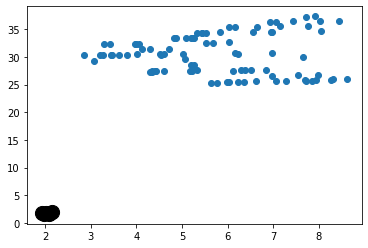

In [167]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tratarDados

tratarDados.tratarDados()

dados = pd.read_csv('./dermatology.data')
dados = dados.drop('result',axis=1)
X = dados.values

# Vamos escolher a quantidade de clusters baseado no método Elbow
# wcss = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters = i, init = 'random')
#     kmeans.fit(X)
#     print (i,kmeans.inertia_)
#     wcss.append(kmeans.inertia_)  
# plt.plot(range(1, 11), wcss)
# plt.title('O Metodo Elbow')
# plt.xlabel('Numero de Clusters')
# plt.ylabel('WSS')
# plt.show()


kmeans = KMeans(n_clusters = 6, init = 'random')
# kmeans.fit(X)
distancias = kmeans.fit_transform(X)

dadosClassificados = kmeans.labels_
listaClassificacoes = np.unique(kmeans.labels_)

filtered_label0 = distancias[dadosClassificados == 0]
# print(filtered_label0)
# print(distancias[0], kmeans.labels_[0])

# print(filtered_label0)
 
centroides = kmeans.cluster_centers_
 
for classificacao in listaClassificacoes:
    plt.scatter(filtered_label0[0,0] , filtered_label0[0,1])
    break
    # plt.scatter(distancias[dadosClassificados == classificacao , 0] , distancias[dadosClassificados == classificacao , 1] , label = classificacao)
    # plt.scatter(X[dadosClassificados == classificacao, 0] , X[dadosClassificados == classificacao, 1] , label = classificacao)
    # break
plt.scatter(centroides[:,0] , centroides[:,1] , s = 200, color = 'black', label = 'Centroides')
# plt.legend()
# plt.show()
